<a href="https://colab.research.google.com/github/Ayushn24/drug-classifier-ANN/blob/main/Drug_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded = files.upload()

Saving drug_class_data.zip to drug_class_data.zip


In [3]:
#importing necessary libraries
import zipfile
import os
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
# Set random seeds
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
with zipfile.ZipFile("drug_class_data.zip","r") as zipf:
  zipf.extractall("data")

In [6]:
csv_path = os.path.join("data","drug200.csv")

In [7]:
df = pd.read_csv(csv_path)

In [8]:
# Exploratory Data Analysis
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [9]:
df.shape

(200, 6)

In [10]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [11]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


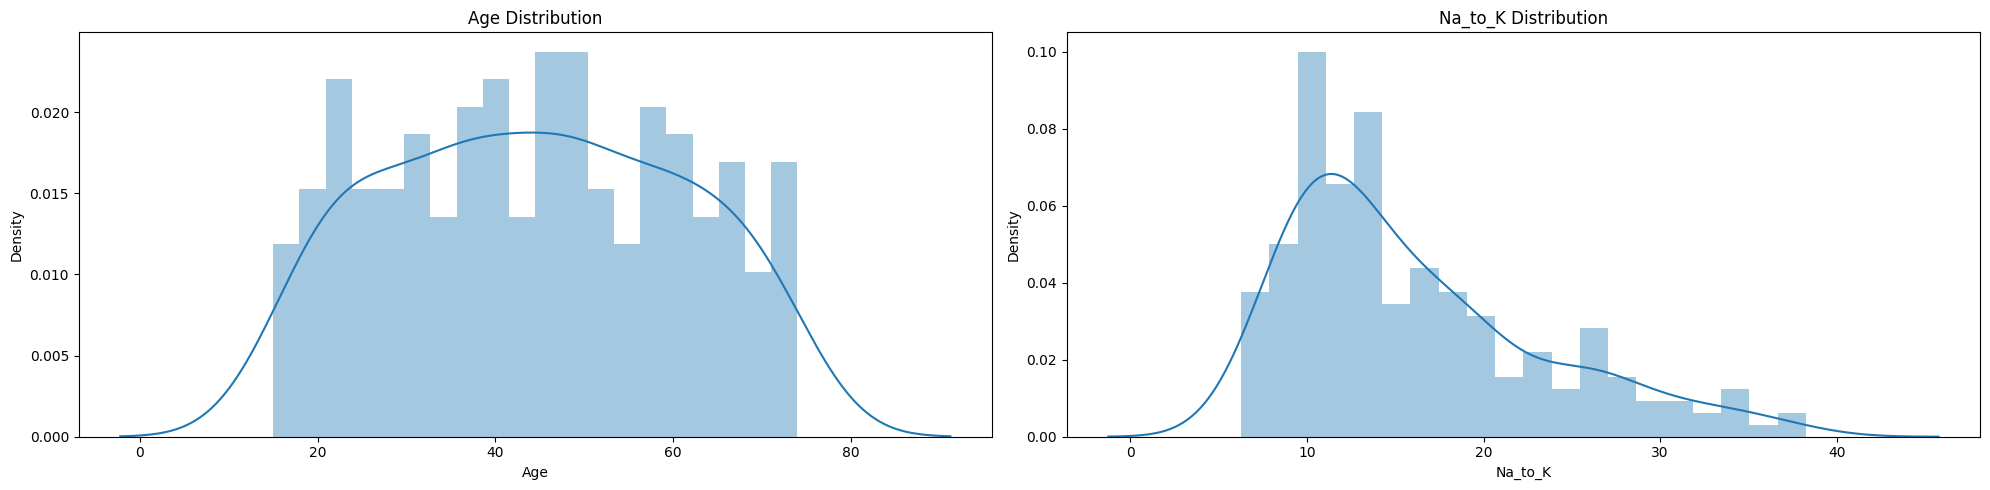

In [12]:
# Plotting distribution plots for numerical features
fig, ax = plt.subplots(1,2, figsize=(20,5))

sns.distplot(df['Age'],ax =ax[0],bins = 20)
ax[0].set_title("Age Distribution")

sns.distplot(df['Na_to_K'],ax =ax[1],bins=20)
ax[1].set_title("Na_to_K Distribution")

plt.tight_layout()
plt.show()

In [13]:
col = list(df.columns)
col

['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']

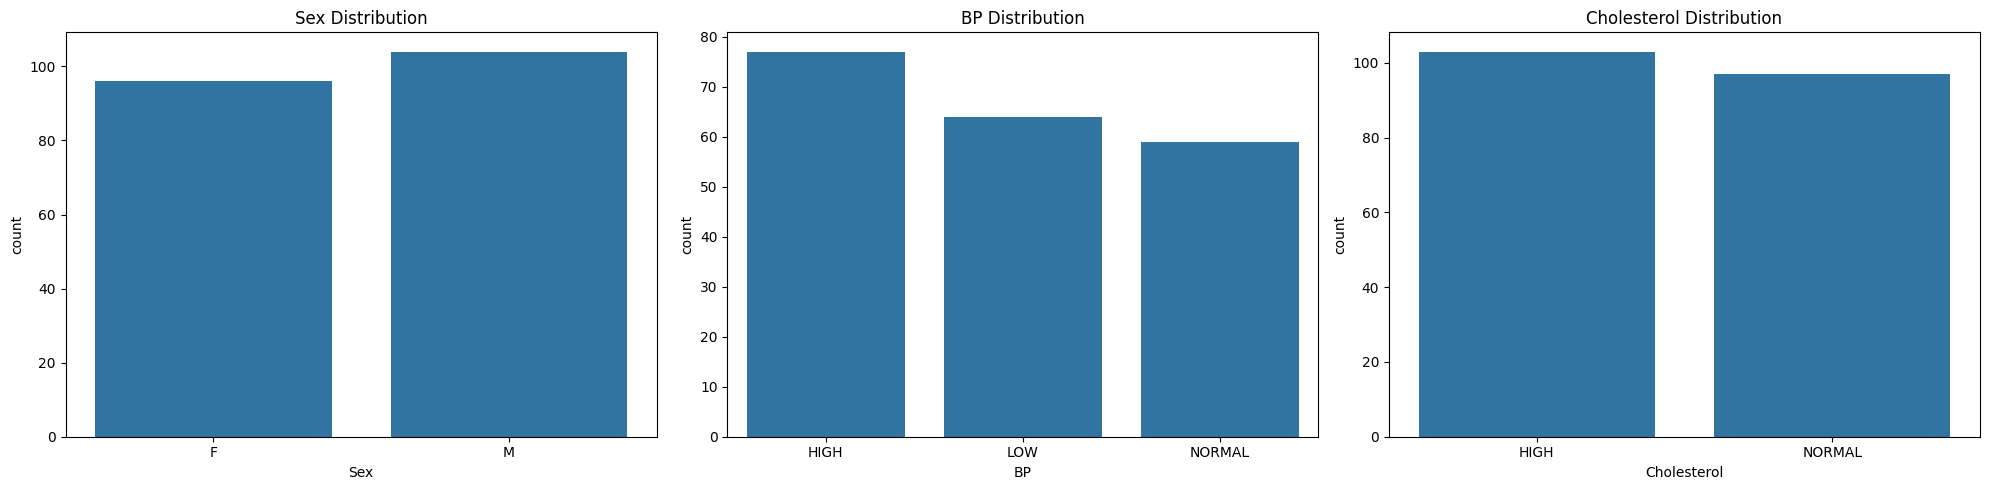

In [14]:
# Plotting countplots for categorical features

fig, ax = plt.subplots(1,3, figsize=(20,5))

sns.countplot(df,x='Sex',ax =ax[0])
ax[0].set_title("Sex Distribution")

sns.countplot(df,x='BP',ax =ax[1])
ax[1].set_title("BP Distribution")

sns.countplot(df,x='Cholesterol',ax =ax[2])
ax[2].set_title("Cholesterol Distribution")

plt.tight_layout()
plt.show()

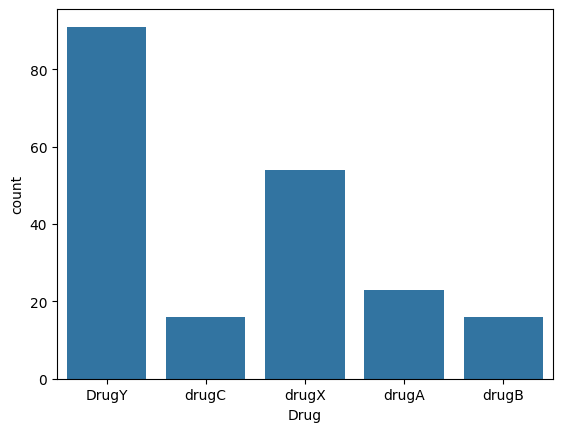

In [15]:
# Plotting the distribution of features
sns.countplot(df,x='Drug')
plt.show()

In [16]:
#Labelling the target variable
target_labels = {
    "drugA": 0,
    "drugB": 1,
    "drugC": 2,
    "drugX": 3,
    "DrugY": 4
}
y = df["Drug"].map(target_labels).values

In [17]:
y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3])

In [18]:
df.drop(columns = ["Drug"],axis=1,inplace = True)

In [19]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [20]:
df["Sex"].unique(),df["BP"].unique(),df["Cholesterol"].unique()

(array(['F', 'M'], dtype=object),
 array(['HIGH', 'LOW', 'NORMAL'], dtype=object),
 array(['HIGH', 'NORMAL'], dtype=object))

In [21]:
# BP and cholesterol are ordinal features so we didnot one hot encode it
bp_map = {'LOW': 0, 'NORMAL': 1, 'HIGH': 2}
chol_map = {'NORMAL': 0, 'HIGH': 1}


df['BP'] = df['BP'].map(bp_map)
df['Cholesterol'] = df['Cholesterol'].map(chol_map)

In [22]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,2,1,25.355
1,47,M,0,1,13.093
2,47,M,0,1,10.114
3,28,F,1,1,7.798
4,61,F,0,1,18.043


In [23]:
encoder = OneHotEncoder()
encoded = encoder.fit_transform(df[['Sex']]).toarray()

col_names = encoder.get_feature_names_out(['Sex'])

In [24]:
encoded.shape

(200, 2)

In [25]:
col_names

array(['Sex_F', 'Sex_M'], dtype=object)

In [26]:
encoded_df = pd.DataFrame(encoded,columns = col_names,index = df.index)

In [27]:
encoded_df

,Sex_F,Sex_M
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
195,1.0,0.0
196,0.0,1.0
197,0.0,1.0
198,0.0,1.0


In [28]:
processed_df = pd.concat([df,encoded_df],axis=1).drop(columns = ["Sex"],axis=1)

In [29]:
processed_df.head()

,Age,BP,Cholesterol,Na_to_K,Sex_F,Sex_M
0,23,2,1,25.355,1.0,0.0
1,47,0,1,13.093,0.0,1.0
2,47,0,1,10.114,0.0,1.0
3,28,1,1,7.798,1.0,0.0
4,61,0,1,18.043,1.0,0.0


In [30]:
X = processed_df.values

In [31]:
X

array([[23.   ,  2.   ,  1.   , 25.355,  1.   ,  0.   ],
       [47.   ,  0.   ,  1.   , 13.093,  0.   ,  1.   ],
       [47.   ,  0.   ,  1.   , 10.114,  0.   ,  1.   ],
       ...,
       [52.   ,  1.   ,  1.   ,  9.894,  0.   ,  1.   ],
       [23.   ,  1.   ,  0.   , 14.02 ,  0.   ,  1.   ],
       [40.   ,  0.   ,  0.   , 11.349,  1.   ,  0.   ]])

In [32]:
# We split the total data into 70% train, 15% val, 15% test.
# First split: (train and val) vs test
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)

# Second split: temp → train and validation that is train vs val
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)
# 0.1765 × 0.85 ≈ 0.15 → 15% of total data becomes validation

# Final shapes
print("Train shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Train shape: (139, 6)
Validation shape: (31, 6)
Test shape: (30, 6)


In [33]:
# Standardize the features
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Model Building
model = Sequential()

model.add(Dense(6, activation='relu', input_shape=(X_train_scaled.shape[1],)))

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(5, activation='softmax'))

In [35]:
model.compile(optimizer= "Adam", loss='sparse_categorical_crossentropy', metrics=['accuracy']) # If you one hot encode your target variables use categorical_crossentropy as loss function

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           165 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,439 (44.68 KB)

 Trainable params: 11,439 (44.68 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
es = EarlyStopping(monitor= "val_loss", mode = "min", verbose = 1, patience= 50)

In [38]:
model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=500, callbacks=[es])

Epoch 1/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 930ms/step - accuracy: 0.1956 - loss: 1.6052 - val_accuracy: 0.3226 - val_loss: 1.5302
Epoch 2/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3087 - loss: 1.5393 - val_accuracy: 0.4839 - val_loss: 1.4715
Epoch 3/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.4345 - loss: 1.4576 - val_accuracy: 0.5161 - val_loss: 1.4148
Epoch 4/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4695 - loss: 1.4460 - val_accuracy: 0.5161 - val_loss: 1.3654
Epoch 5/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4599 - loss: 1.4170 - val_accuracy: 0.4839 - val_loss: 1.3182
Epoch 6/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5229 - loss: 1.3246 - val_accuracy: 0.4839 - val_loss: 1.2720
Epoch 7/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.4988 - loss: 1.2998 - val_accuracy: 0.4839 - val_loss: 1.2252
Epoch 8/500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5316 - loss: 1.2920 - val_accuracy: 0.4839 - val_loss

In [39]:
history_df = pd.DataFrame(model.history.history)
history_df

,accuracy,loss,val_accuracy,val_loss
0,0.201439,1.602225,0.322581,1.530216
1,0.330935,1.520128,0.483871,1.471519
2,0.424460,1.467857,0.516129,1.414789
3,0.474820,1.441974,0.516129,1.365359
4,0.446043,1.418992,0.483871,1.318218
...,...,...,...,...
293,0.978417,0.062979,0.935484,0.241290
294,0.956835,0.091093,0.935484,0.245064
295,0.964029,0.124060,0.935484,0.216721
296,0.964029,0.081233,0.935484,0.195837


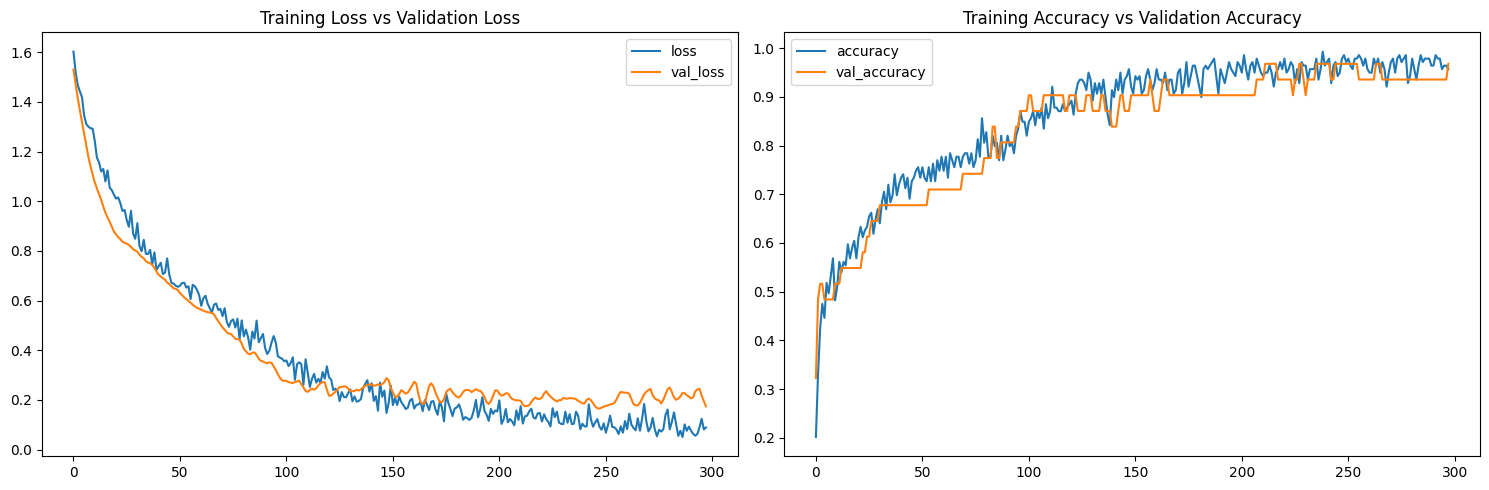

In [40]:
# Plotting model performance
fig, ax = plt.subplots(1,2, figsize=(15,5))

history_df[["loss","val_loss"]].plot(ax = ax[0])
ax[0].set_title("Training Loss vs Validation Loss")

history_df[["accuracy","val_accuracy"]].plot(ax = ax[1])
ax[1].set_title("Training Accuracy vs Validation Accuracy")

plt.tight_layout()
plt.show()

In [41]:
# Model Evaluation
model.evaluate(X_test_scaled,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 627ms/step - accuracy: 0.9333 - loss: 0.5660


[0.5659971237182617, 0.9333333373069763]

In [42]:
y_pred = model.predict(X_test_scaled).argmax(axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step


In [43]:
y_pred

array([4, 1, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 0, 1, 4, 4, 0, 3, 3, 4, 3, 4,
       2, 0, 4, 3, 1, 4, 2, 4])

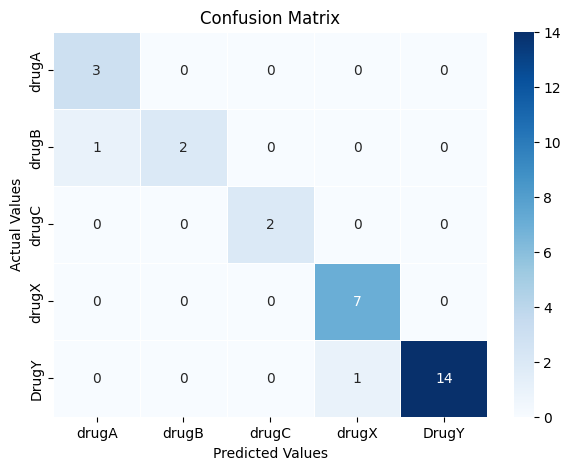

In [51]:
# Plotting the confusion matrix
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt="d", cbar = True, linewidths=0.5, cmap = "Blues", xticklabels= ["drugA", "drugB","drugC","drugX","DrugY"],
            yticklabels=["drugA", "drugB","drugC","drugX","DrugY"]) #only 2 misclassifications
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()